# MSc Thesis - Hugo Stam

### Chapter 5.1 - Cost estimates of the port system alternatives for the specified design scenarios (a)

<img src="Figures/alternative_1.png"  style="width:500px">
<img src="Figures/alternative_2A.png" style="width:600px">
<img src="Figures/alternative_3.png"  style="width:600px">

In [1]:
# packages for data handling
import numpy as np
import pandas as pd

# packages for figures
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

# Jupyter Widgets
from IPython.display import Javascript, display
from ipywidgets import widgets

# Scroll to specific cell
from jupyter_helpers.utilities import scroll_to_current_cell

# no warnings
import warnings
warnings.filterwarnings('ignore')

#display dfs side by side
from IPython.core.display import HTML

def multi_table(table_list):
    return HTML('<table><tr style="background-color:white;">' + 
                ''.join(['<td>' + table._repr_html_() + '</td>' for table in table_list]) + '</tr></table>')

In [2]:
cmap_tab20c = plt.get_cmap("tab20c")
cmap_tab20 = plt.get_cmap("tab20")
cmap_tab10 = plt.get_cmap("tab10")

pal_sens = cmap_tab10(np.array([0, 1, 2]))

pal_0 = cmap_tab20c(np.array([1, 5, 9]))

pal_1a = cmap_tab20c(np.array([2, 1, 0]))
pal_2a = cmap_tab20c(np.array([6, 5, 4]))
pal_3a = cmap_tab20c(np.array([10, 9, 8]))

pal_1b = cmap_tab20c(np.array([0, 1, 3]))
pal_2b = cmap_tab20c(np.array([4, 5, 7]))
pal_3b = cmap_tab20c(np.array([8, 9, 11]))

In [3]:
# Alt 1
%store -r PV_alt1_6000_1000000
%store -r PV_alt1_12500_1000000
%store -r PV_alt1_21000_1000000

# Alt 2
%store -r PV_alt2_20_6000_1000000
%store -r PV_alt2_20_12500_1000000
%store -r PV_alt2_20_21000_1000000

%store -r PV_alt2_40_6000_1000000
%store -r PV_alt2_40_12500_1000000
%store -r PV_alt2_40_21000_1000000

%store -r PV_alt2_60_6000_1000000
%store -r PV_alt2_60_12500_1000000
%store -r PV_alt2_60_21000_1000000

# Alt 3
%store -r PV_alt3_20_6000_1000000
%store -r PV_alt3_20_12500_1000000
%store -r PV_alt3_20_21000_1000000

%store -r PV_alt3_40_6000_1000000
%store -r PV_alt3_40_12500_1000000
%store -r PV_alt3_40_21000_1000000

%store -r PV_alt3_60_6000_1000000
%store -r PV_alt3_60_12500_1000000
%store -r PV_alt3_60_21000_1000000

## Create DataFrames

In [4]:
PVs_1 = [["Panamax",     20, PV_alt1_6000_1000000,  'Alt1'], 
         ["New-Panamax", 20, PV_alt1_12500_1000000, 'Alt1'], 
         ["ULCS",        20, PV_alt1_21000_1000000, 'Alt1'],
         ["Panamax",     40, PV_alt1_6000_1000000,  'Alt1'], 
         ["New-Panamax", 40, PV_alt1_12500_1000000, 'Alt1'], 
         ["ULCS",        40, PV_alt1_21000_1000000, 'Alt1'],
         ["Panamax",     60, PV_alt1_6000_1000000,  'Alt1'], 
         ["New-Panamax", 60, PV_alt1_12500_1000000, 'Alt1'], 
         ["ULCS",        60, PV_alt1_21000_1000000, 'Alt1']]

PVs_2 = [["Panamax",     20, PV_alt2_20_6000_1000000,  'Alt2'], 
         ["New-Panamax", 20, PV_alt2_20_12500_1000000, 'Alt2'], 
         ["ULCS",        20, PV_alt2_20_21000_1000000, 'Alt2'],
         ["Panamax",     40, PV_alt2_40_6000_1000000,  'Alt2'], 
         ["New-Panamax", 40, PV_alt2_40_12500_1000000, 'Alt2'], 
         ["ULCS",        40, PV_alt2_40_21000_1000000, 'Alt2'],
         ["Panamax",     60, PV_alt2_60_6000_1000000,  'Alt2'], 
         ["New-Panamax", 60, PV_alt2_60_12500_1000000, 'Alt2'], 
         ["ULCS",        60, PV_alt2_60_21000_1000000, 'Alt2']]

PVs_3 = [["Panamax",     20, PV_alt3_20_6000_1000000,  'Alt3'], 
         ["New-Panamax", 20, PV_alt3_20_12500_1000000, 'Alt3'], 
         ["ULCS",        20, PV_alt3_20_21000_1000000, 'Alt3'],
         ["Panamax",     40, PV_alt3_40_6000_1000000,  'Alt3'], 
         ["New-Panamax", 40, PV_alt3_40_12500_1000000, 'Alt3'], 
         ["ULCS",        40, PV_alt3_40_21000_1000000, 'Alt3'],
         ["Panamax",     60, PV_alt3_60_6000_1000000,  'Alt3'], 
         ["New-Panamax", 60, PV_alt3_60_12500_1000000, 'Alt3'], 
         ["ULCS",        60, PV_alt3_60_21000_1000000, 'Alt3']]

df_1 = pd.DataFrame(PVs_1,columns=['vessel','distance','PV','Alternative'])
df_1['distance'] = df_1['distance'].astype(float)

df_2 = pd.DataFrame(PVs_2,columns=['vessel','distance','PV','Alternative'])
df_2['distance'] = df_2['distance'].astype(float)

df_3 = pd.DataFrame(PVs_3,columns=['vessel','distance','PV','Alternative'])
df_3['distance'] = df_3['distance'].astype(float)

table_list = [df_1, df_2, df_3]
# display(multi_table(table_list))

total_df = pd.concat(table_list)

def scenario_table(df_):
    df = pd.DataFrame(index=['6,000 TEU','12,500 TEU','21,000 TEU'],columns=['20 km', '40 km', '60 km'])
    df.index.name = "Design Vessel"
    df.columns.name = "Offshore Distance"
    df['20 km'] = list(df_.PV[0:3]/10**6)
    df['40 km'] = list(df_.PV[3:6]/10**6)
    df['60 km'] = list(df_.PV[6:9]/10**6)
    df['20 km'] = df['20 km'].map('$ {:,.0f}'.format)
    df['40 km'] = df['40 km'].map('$ {:,.0f}'.format)
    df['60 km'] = df['60 km'].map('$ {:,.0f}'.format)
    return df

df_alt1 = scenario_table(df_1)
df_alt2 = scenario_table(df_2)
df_alt3 = scenario_table(df_3)

table_list = [df_alt1, df_alt2, df_alt3]
display(multi_table(table_list))

Offshore Distance,20 km,40 km,60 km
Design Vessel,,,
"6,000 TEU","$ 3,888","$ 3,888","$ 3,888"
"12,500 TEU","$ 4,850","$ 4,850","$ 4,850"
"21,000 TEU","$ 5,672","$ 5,672","$ 5,672"
Offshore Distance,20 km,40 km,60 km
Design Vessel,,,
"6,000 TEU","$ 4,367","$ 4,287","$ 4,533"
"12,500 TEU","$ 4,566","$ 4,147","$ 4,411"
"21,000 TEU","$ 4,728","$ 4,051","$ 4,320"
Offshore Distance,20 km,40 km,60 km


In [51]:
def grouped_barplot(alt, alt_name, data, palette, edge, legend, fontsize, hline):
    plt.figure(figsize=[5,5]);
    sns.factorplot(x="distance", y="PV", hue="vessel", edgecolor=edge, data=data, kind="bar", legend=False, palette=palette);
    
#     if hline == 'New-Panamax':
#         plt.axhline(4_850_000_000, linestyle='--', color = pal_1b[0])
#         plt.text(0, 4_950_000_000, 'Onshore\nNew-Panamax', fontsize=fontsize,
#                  horizontalalignment='center', verticalalignment='bottom', color=pal_1b[0])

#     if hline == 'ULCS':
#         plt.axhline(5_672_000_000, linestyle='--', color = pal_1b[0])
#         plt.text(0, 5_772_000_000, 'Onshore\nULCS', fontsize=fontsize, 
#                  horizontalalignment='center', verticalalignment='bottom', color=pal_1b[0])
    
    sns.despine(right=True, top=True)
    plt.title('Cost estimates: {}'.format(alt_name), fontsize=fontsize)
    plt.ylabel('PV of the costs', fontsize=fontsize)
    if len(data) == 3:
        plt.xlabel('blanco', color='white', fontsize=fontsize)
        plt.xticks([0], ["Onshore"])
    else: 
        plt.xlabel('Offshore distance', fontsize=fontsize)
        plt.xticks([0, 1, 2], ["20 km", "40 km", "60 km"])
    plt.yticks(np.arange(0, 8*10**9, step = 10**9), ["","$ 1B","$ 2B","$ 3B","$ 4B", "$ 5B", "$ 6B", "$ 7B"])
    
    if edge == "white" and legend == "inside":
        plt.legend(fontsize='large', loc='lower right', framealpha=0.9, frameon=True)
        plt.savefig("SaveFigures/PV_bar_plot_inlegend_{}.png".format(alt), bbox_inches = 'tight')
    if edge == "white" and legend == "outside":
        plt.legend(title='Design vessel', fontsize=fontsize, title_fontsize=fontsize,
                   bbox_to_anchor=(1., 0.6), frameon=False)
        plt.savefig("SaveFigures/PV_bar_plot_outlegend_{}.png".format(alt), bbox_inches = 'tight')

<Figure size 360x360 with 0 Axes>

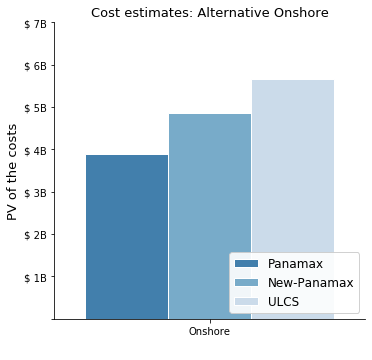

<Figure size 360x360 with 0 Axes>

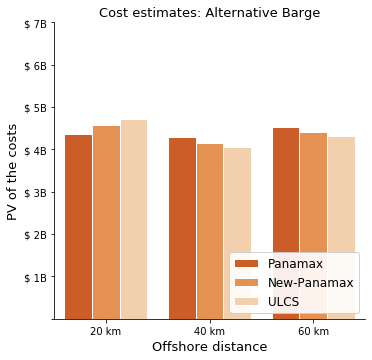

<Figure size 360x360 with 0 Axes>

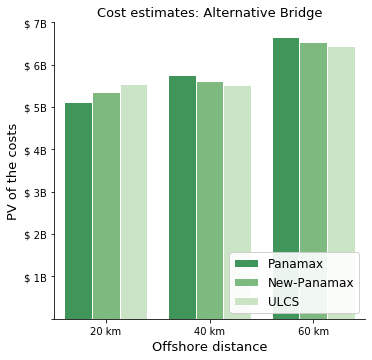

In [52]:
grouped_barplot(1, 'Alternative Onshore', df_1[0:3], pal_1b, 'white', "inside", 13, None)
grouped_barplot(2, 'Alternative Barge',   df_2,      pal_2b, 'white', "inside", 13, "New-Panamax")
grouped_barplot(3, 'Alternative Bridge',  df_3,      pal_3b, 'white', "inside", 13, "ULCS")